In [1]:
import sys
from os.path import join, abspath
from glob import glob
import numpy as np
import vaex
from tqdm import tqdm
import matplotlib.pyplot as plt
from time import time
from scipy.optimize import curve_fit
from scipy.stats import norm, skewnorm

In [2]:
# import utils
root_dir = abspath(join('..'))
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/6_Analisis',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [4]:
from utils import style, hdi, load_spectral_types

In [5]:
sp = load_spectral_types()
sp

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [6]:
style(name="seaborn-notebook")

In [7]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [8]:
data_baryon_dir = join(root_data_dir, "Baryon")
# load baryons components
df_baryon = vaex.open(join(data_baryon_dir, "baryon.hdf5"))
rhos = df_baryon["rho"].to_numpy()  # Msun/pc^3
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s

e_rhos = df_baryon["e_rho"].to_numpy()  # Msun/pc^3
e_sigmaz = df_baryon["e_sigma_z"].to_numpy() # km/s
dpi=100

In [9]:
boundaries = np.load(join(root_data_dir, "boundaries.npy"))
boundaries

array([[-0.019     ,  0.12713703],
       [ 0.12713703,  0.19024014],
       [ 0.19024014,  0.22021412],
       [ 0.22021412,  0.24230021],
       [ 0.24230021,  0.26004796],
       [ 0.26004796,  0.27621813],
       [ 0.27621813,  0.28923315],
       [ 0.28923315,  0.30106498],
       [ 0.30106498,  0.31329121],
       [ 0.31329121,  0.32512304],
       [ 0.32512304,  0.3353773 ],
       [ 0.3353773 ,  0.34523716],
       [ 0.34523716,  0.35509702],
       [ 0.35509702,  0.36535128],
       [ 0.36535128,  0.37402796]])

In [10]:
c1 = boundaries[:, 0]
c2 = boundaries[:, 1]
c = (c1 + c2) / 2
c

array([0.05406852, 0.15868859, 0.20522713, 0.23125717, 0.25117408,
       0.26813305, 0.28272564, 0.29514907, 0.3071781 , 0.31920713,
       0.33025017, 0.34030723, 0.35016709, 0.36022415, 0.36968962])

In [11]:
mcmc_dir = join(root_data_dir, "MCMC-no", "dm", "data")
mcmc_dir

'/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data'

In [12]:
files = glob(join(mcmc_dir, "chain-*"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-(-0.019)_(0.127).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-(0.127)_(0.190).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-(0.190)_(0.220).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-(0.220)_(0.242).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-(0.242)_(0.260).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-(0.260)_(0.276).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-(0.276)_(0.289).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-(0.289)_(0.301).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-(0.301)_(0.313).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-(0.313)_(0.325).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-(0.325)_(0.335).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dm/data/chain-(0.335)_(0.345).npy',
 '/

## tes

In [13]:
index = 0
df = np.load(files[index])
df.shape

(2500, 330, 33)

In [14]:
rhob = df[:, :, 12:24]
rhob = rhob.reshape(-1, 12)
rhob = rhob.sum(axis=1)/1E-2
rhoDM = df[:, :, 24].reshape(-1)/1E-2
length = len(rhob)
rhob0 = np.empty((length, 12))
for i in range(12):
    rhob0[:,i] = norm.rvs(loc=rhos[i], scale=e_rhos[i], size=length)
rhob0 = rhob0.sum(axis=1)/1E-2

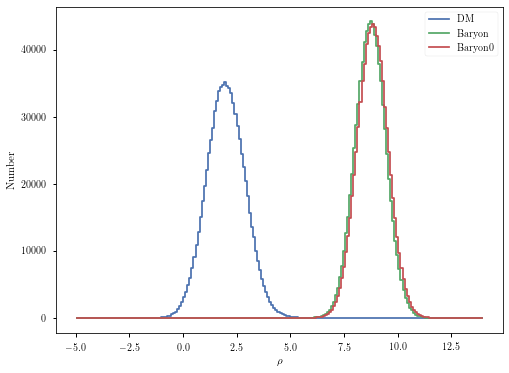

In [15]:
rho = np.linspace(-5, 14, 200)
rhoDM_num, _ = np.histogram(rhoDM, bins=rho)
rhob_num, _ = np.histogram(rhob, bins=rho)
rhob0_num, _ = np.histogram(rhob0, bins=rho)
rhomid = 0.5*(rho[1:] + rho[:-1])
# plot step
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(rhomid, rhoDM_num, label='DM')
ax.step(rhomid, rhob_num, label='Baryon')
ax.step(rhomid, rhob0_num, label='Baryon0')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel('Number')
ax.legend()
plt.show()

In [16]:
rhoDM_sample = np.random.choice(rhoDM, size=50_000, replace=False)
rhoDM_fit = skewnorm.fit(rhoDM_sample)
rhob_sample = np.random.choice(rhob, size=50_000, replace=False)
rhob_fit = skewnorm.fit(rhob_sample)
rhob0_sample = np.random.choice(rhob0, size=50_000, replace=False)
rhob0_fit = norm.fit(rhob0_sample)

((0.8180489780204885, 1.5315384973159225, 1.0261632151995614),
 (0.00019004861746099098, 8.786871522251534, 0.7109572105531239),
 (8.894481868384686, 0.7173658897663461))

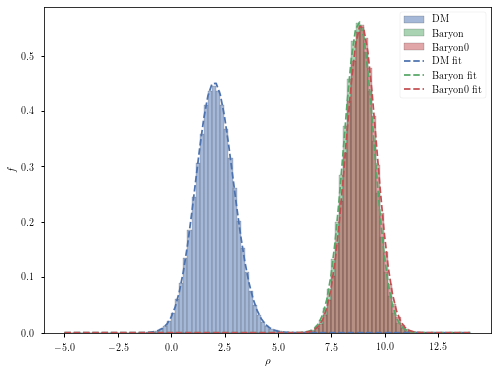

In [17]:
# plot
rho = np.linspace(-5, 14, 100)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhoDM, bins=rho, density=True, label='DM', ec='k', alpha=0.5, color='C0')
ax.hist(rhob, bins=rho, density=True, label='Baryon', ec='k', alpha=0.5,color='C1')
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, skewnorm.pdf(rho, *rhoDM_fit), label='DM fit', color='C0',  ls='--')
ax.plot(rho, skewnorm.pdf(rho, *rhob_fit), label='Baryon fit', color='C1', ls='--')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
rhoDM_fit, rhob_fit, rhob0_fit

rhoDM = 2.01 +0.89/-0.86
rhob = 8.79 +0.70/-0.71
rhob0 = 8.89 +0.72/-0.71


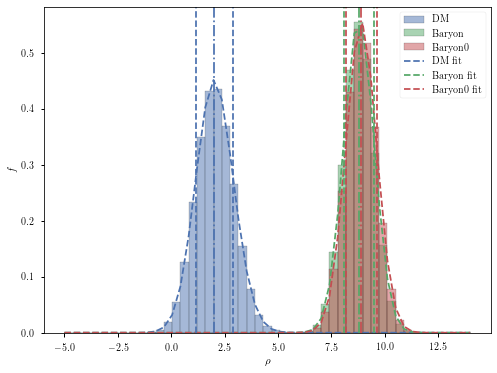

In [18]:
sigma = np.array([68, 90, 95])
alpha = 1 - sigma/100

hpd, modes = hdi(lambda x: skewnorm.pdf(x, *rhoDM_fit), -3, 7, alpha=alpha[0])
rhoDM_mode = modes[0]
rhoDM_low, rhoDM_high = hpd[0]

hpd, modes = hdi(lambda x: skewnorm.pdf(x, *rhob_fit), 5, 12.5, alpha=alpha[0])
rhob_mode = modes[0]
rhob_low, rhob_high = hpd[0]

hpd, modes = hdi(lambda x: norm.pdf(x, *rhob0_fit), 5, 12.5, alpha=alpha[0])
rhob0_mode = modes[0]
rhob0_low, rhob0_high = hpd[0]

# plot
rho = np.linspace(-5, 14, 50)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhoDM, bins=rho, density=True, label='DM', ec='k', alpha=0.5, color='C0')
ax.hist(rhob, bins=rho, density=True, label='Baryon', ec='k', alpha=0.5,color='C1')
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, skewnorm.pdf(rho, *rhoDM_fit), label='DM fit', color='C0',  ls='--')
ax.plot(rho, skewnorm.pdf(rho, *rhob_fit), label='Baryon fit', color='C1', ls='--')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.axvline(rhoDM_mode, color='C0', ls='-.')
ax.axvline(rhob_mode, color='C1', ls='-.')
ax.axvline(rhob0_mode, color='C2', ls='-.')
ax.axvline(rhoDM_low, color='C0', ls='--')
ax.axvline(rhoDM_high, color='C0', ls='--')
ax.axvline(rhob_low, color='C1', ls='--')
ax.axvline(rhob_high, color='C1', ls='--')
ax.axvline(rhob0_low, color='C2', ls='--')
ax.axvline(rhob0_high, color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
print(f'rhoDM = {rhoDM_mode:.02f} +{rhoDM_high-rhoDM_mode:.02f}/-{rhoDM_mode-rhoDM_low:.02f}')
print(f'rhob = {rhob_mode:.02f} +{rhob_high-rhob_mode:.02f}/-{rhob_mode-rhob_low:.02f}')
print(f'rhob0 = {rhob0_mode:.02f} +{rhob0_high-rhob0_mode:.02f}/-{rhob0_mode-rhob0_low:.02f}')

rhob0 = 8.89 +0.72/-0.71


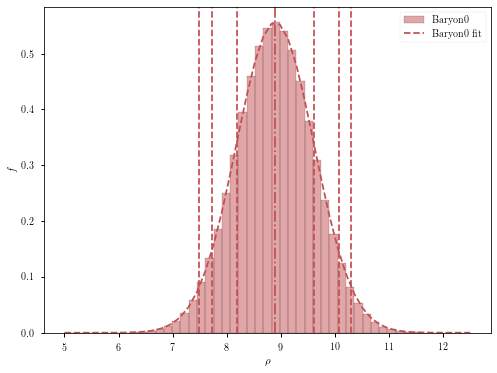

In [19]:
rhob0_low = []
rhob0_high = []
for i, alp in enumerate(alpha):
    hpd, modes = hdi(lambda x: norm.pdf(x, *rhob0_fit), low=5, high=12.5, alpha=alp)
    low, high = hpd[0]
    rhob0_low.append(low)
    rhob0_high.append(high)
# plot
rho = np.linspace(5, 12.5, 50)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.axvline(rhob0_mode, color='C2', ls='-.')
for low, high in zip(rhob0_low, rhob0_high):
    ax.axvline(low, color='C2', ls='--')
    ax.axvline(high, color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
print(f'rhob0 = {rhob0_mode:.02f} +{rhob0_high[0]-rhob0_mode:.02f}/-{rhob0_mode-rhob0_low[0]:.02f}')

In [20]:
from tqdm import tqdm

rhoDM_modes = []
rhoDM_errs = []
rhob_modes = []
rhob_errs = []
rhoDM_fits = []

for file in tqdm(files):
    df = np.load(file)
    rhob = df[:, :, 12:24]
    rhob = rhob.reshape(-1, 12)
    rhob = rhob.sum(axis=1)/1E-2
    rhoDM = df[:, :, 24].reshape(-1)/1E-2
    # print("fitting...")
    rhoDM_sample = np.random.choice(rhoDM, size=10_000, replace=False)
    rhoDM_fit = skewnorm.fit(rhoDM_sample)
    rhoDM_fits.append(rhoDM_fit)
    rhob_sample = np.random.choice(rhob, size=10_000, replace=False)
    rhob_fit = skewnorm.fit(rhob_sample)
    # print("calculating HDI...")
    rhoDM_err = []
    rhob_err = []
    rhoDM_mode = None
    rhob_mode = None
    for i, alp in enumerate(alpha):
        hpd, modes = hdi(lambda x: skewnorm.pdf(x, *rhoDM_fit), -5, 10, alpha=alp)
        rhoDM_mode = modes[0]
        low, high = hpd[0]
        rhoDM_err.append({'alpha': alp, 'low': low, 'high': high})

        hpd, modes = hdi(lambda x: skewnorm.pdf(x, *rhob_fit), 5, 15, alpha=alp)
        rhob_mode = modes[0]
        low, high = hpd[0]
        rhob_err.append({'alpha': alp, 'low': low, 'high': high})
    rhoDM_errs.append(rhoDM_err)
    rhob_errs.append(rhob_err)
    rhoDM_modes.append(rhoDM_mode)
    rhob_modes.append(rhob_mode)

100%|██████████| 15/15 [00:07<00:00,  2.05it/s]


In [21]:
rhoDM_fits

[(0.8700398898810202, 1.5035024834313282, 1.0475373896423341),
 (0.9412238225270964, 1.0236769008357802, 1.1616175151899408),
 (1.1357192553942255, 3.0451497359448823, 1.4102699057730939),
 (0.8779534568821834, 5.529541756675945, 1.5126040459866874),
 (1.4160029814617485, 5.702795085103764, 2.011933028947353),
 (1.0528510881678854, 5.113590713713817, 1.848881123873442),
 (0.9973683606305397, 3.747731903637882, 1.738877540042925),
 (1.0214751732066745, 3.258952314969859, 1.7766090381567228),
 (1.0866395776117403, 1.4453459973306892, 1.7506999019595582),
 (1.2442494399062305, 1.2879867753743457, 1.9293957669387454),
 (1.0749268699638286, 1.5469638302567286, 2.0352869038926373),
 (0.9547983030320795, 0.33680391540417687, 1.8047917831167533),
 (1.1001163114818744, -0.10513582138029956, 1.977823012688528),
 (1.1254319192652302, 1.5268070148571278, 2.117034234679584),
 (1.138680021858439, -0.2824902916636097, 2.021910188381305)]

In [22]:
dc = c2-c1
dc

array([0.14613703, 0.06310311, 0.02997398, 0.02208609, 0.01774775,
       0.01617017, 0.01301502, 0.01183183, 0.01222623, 0.01183183,
       0.01025426, 0.00985986, 0.00985986, 0.01025426, 0.00867668])

(-2.0, 5.0)

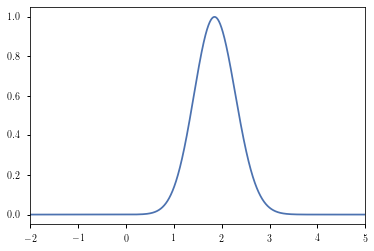

In [45]:
# multiplying the rhoDM, but it became addition in log
rho = np.linspace(-5, 14, 10000)
log_rhoDM = None
for i, (p, dc_i) in enumerate(zip(rhoDM_fits, dc)):
    if 1 < i < 8: # skip F
        continue
    if log_rhoDM is None:
        log_rhoDM = skewnorm.logpdf(rho, *p)
    else:
        log_rhoDM += skewnorm.logpdf(rho, *p)
# turn into rhoDM
rhoDM_com = np.exp(log_rhoDM)
# normalize with max value
rhoDM_com /= rhoDM_com.max()
# plot
fig, ax = plt.subplots()
ax.plot(rho, rhoDM_com, label='rhoDM')
ax.set_xlim(-2,5)

In [46]:
def skewpdf(x, *args):
    A, other = args[0], args[1:]
    return A*skewnorm.pdf(x, *other)

rhoDM_com_fit, _ = curve_fit(skewpdf, rho, rhoDM_com, p0=[1, 1.0, 2.0, 1])
rhoDM_com_fit

array([1.0869203 , 0.6633304 , 1.64663295, 0.48402319])

(0.0, 5.0)

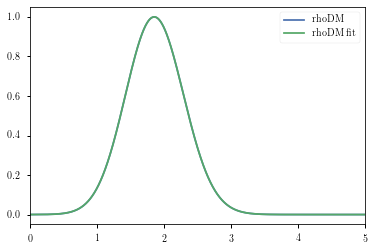

In [47]:
plt.plot(rho, rhoDM_com, label='rhoDM')
plt.plot(rho, skewpdf(rho, *rhoDM_com_fit), label='rhoDM fit')
plt.legend()
plt.xlim(0,5)

In [48]:
rhoDM_com_err = []
rhoDM_com_mode = None
for i, alp in enumerate(alpha):
    hpd, modes = hdi(lambda x: skewpdf(x, *rhoDM_com_fit), low=0.5, high=5, alpha=alp)
    low, high = hpd[0]
    rhoDM_com_err.append({'sigma':sigma, 'low': low, 'high': high})
    rhoDM_com_mode = modes[0]
rhoDM_com_mode, rhoDM_com_err

(1.85,
 [{'sigma': 2.139976635386471, 'low': 1.42, 'high': 2.28},
  {'sigma': 2.139976635386471, 'low': 1.15, 'high': 2.57},
  {'sigma': 2.139976635386471, 'low': 1.02, 'high': 2.71}])

In [49]:
print(f"{rhoDM_com_mode} + {rhoDM_com_err[0]['high']-rhoDM_com_mode} - {rhoDM_com_mode-rhoDM_com_err[0]['low']}")

1.85 + 0.4299999999999997 - 0.43000000000000016


In [27]:
A9 = sp[sp['SpT'] == 'A9V']['J-K'].values[0]
F0 = sp[sp['SpT'] == 'F0V']['J-K'].values[0]
b1 = (A9+F0)/2

F9 = sp[sp['SpT'] == 'F9V']['J-K'].values[0]
G0 = sp[sp['SpT'] == 'G0V']['J-K'].values[0]
b2 = (F9+G0)/2
b1, b2

(0.1355, 0.314)

In [28]:
c1

array([-0.019     ,  0.12713703,  0.19024014,  0.22021412,  0.24230021,
        0.26004796,  0.27621813,  0.28923315,  0.30106498,  0.31329121,
        0.32512304,  0.3353773 ,  0.34523716,  0.35509702,  0.36535128])

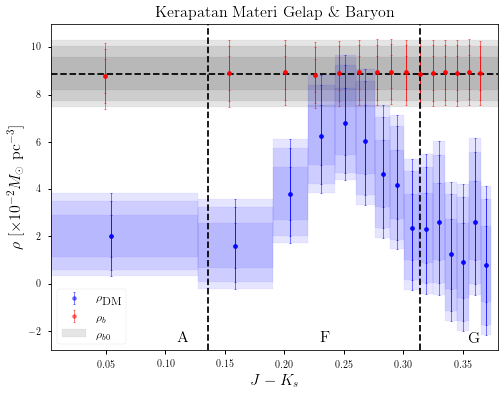

3.0

In [29]:
cs = np.linspace(c.min()-0.05, c.max()+0.01, 100)

def band(ax, c1, c2, low, high, color='blue', alpha=0.1):
    ax.fill_between([c1, c2], [low, low], [high, high], color=color, alpha=alpha)
    return 

fig, ax = plt.subplots(figsize=(8, 6))
ax.axhline(y=rhob0_mode, color='black', linestyle='--')
for i in range(3):
    low = np.array([err[i]['low'] for err in rhoDM_errs])
    high = np.array([err[i]['high'] for err in rhoDM_errs])
    dm_ax = ax.errorbar(c, rhoDM_modes, yerr=[rhoDM_modes-low, high-rhoDM_modes], fmt='.', color='blue', capsize=1, alpha=0.5, elinewidth=1, markeredgewidth=1)
    for j in range(len(c)):
        band(ax, c1[j], c2[j], low[j], high[j], color='blue', alpha=0.1)
    low = np.array([err[i]['low'] for err in rhob_errs])
    high = np.array([err[i]['high'] for err in rhob_errs])
    rhob_ax = ax.errorbar(c-0.005, rhob_modes, yerr=[rhob_modes-low, high-rhob_modes], fmt='.', color='red', capsize=1, alpha=0.5, elinewidth=1, markeredgewidth=1)
    rhob0_ax = ax.fill_between(cs, rhob0_low[i], rhob0_high[i], color='black', alpha=0.1)
    # rhoDM_com_ax = ax.fill_between(cs, rhoDM_com_err[i]['low'], rhoDM_com_err[i]['high'], color='C0', alpha=0.1)
    if i == 2:
        # ax.legend([dm_ax, rhob_ax, rhob0_ax, rhoDM_com_ax], 
        #           [r'$\rho_{\textup{DM}}$', r'$\rho_{b}$', r'$\rho_{b0}$', r'$\rho_{\textup{DM,com}}$'],
        #           loc='best', fontsize=12)
        ax.legend([dm_ax, rhob_ax, rhob0_ax], 
                  [r'$\rho_{\textup{DM}}$', r'$\rho_{b}$', r'$\rho_{b0}$'],
                  loc='best', fontsize=12)
# real value
# ax.axhline(y=rhoDM_com_mode, color='black', linestyle='--')
ax.axvline(x=b1, color='black', linestyle='--')
ax.axvline(x=b2, color='black', linestyle='--')
ax.text(0.11, -2.5, r'$\textup{A}$', fontsize=16)
ax.text(0.23, -2.5, r'$\textup{F}$', fontsize=16)
ax.text(0.355, -2.5, r'$\textup{G}$', fontsize=16)
ax.set_xlabel(r'$J-K_s$', fontsize=16)
ax.set_ylabel(r'$\rho$ [$\times 10^{-2}M_{\odot}\ $pc$^{-3}$]', fontsize=16)
ax.set_xlim(cs.min(), cs.max())
ax.set_title("Kerapatan Materi Gelap \& Baryon", fontsize=16)
# ax.grid()
fig.savefig(join('img', 'rhoDM-dm.pdf'), dpi=70)
plt.show()
rhoDM_com_mode

In [30]:
rhoDM_errs

[[{'alpha': 0.31999999999999995, 'low': 1.14, 'high': 2.9},
  {'alpha': 0.09999999999999998, 'low': 0.58, 'high': 3.51},
  {'alpha': 0.050000000000000044, 'low': 0.32, 'high': 3.82}],
 [{'alpha': 0.31999999999999995, 'low': 0.66, 'high': 2.58},
  {'alpha': 0.09999999999999998, 'low': 0.06, 'high': 3.25},
  {'alpha': 0.050000000000000044, 'low': -0.23, 'high': 3.58}],
 [{'alpha': 0.31999999999999995, 'low': 2.71, 'high': 4.93},
  {'alpha': 0.09999999999999998, 'low': 2.03, 'high': 5.73},
  {'alpha': 0.050000000000000044, 'low': 1.71, 'high': 6.14}],
 [{'alpha': 0.31999999999999995, 'low': 5.01, 'high': 7.55},
  {'alpha': 0.09999999999999998, 'low': 4.23, 'high': 8.42},
  {'alpha': 0.050000000000000044, 'low': 3.85, 'high': 8.83}],
 [{'alpha': 0.31999999999999995, 'low': 5.44, 'high': 8.3},
  {'alpha': 0.09999999999999998, 'low': 4.68, 'high': 9.27},
  {'alpha': 0.050000000000000044, 'low': 4.38, 'high': 9.68}],
 [{'alpha': 0.31999999999999995, 'low': 4.63, 'high': 7.58},
  {'alpha': 0.0

In [39]:
low1 = np.array([err[0]['low'] for err in rhoDM_errs])
high1 = np.array([err[0]['high'] for err in rhoDM_errs])

rhoDM_mode_min = np.argmin(rhoDM_modes)
rhoDM_mode_max = np.argmax(rhoDM_modes)

sigma_max = np.sqrt((high1[rhoDM_mode_max] - rhoDM_modes[rhoDM_mode_max])*(rhoDM_modes[rhoDM_mode_max] - low1[rhoDM_mode_max]))
sigma_min = np.sqrt((high1[rhoDM_mode_min] - rhoDM_modes[rhoDM_mode_min])*(rhoDM_modes[rhoDM_mode_min] - low1[rhoDM_mode_min]))

sigma = np.sqrt(sigma_max**2 + sigma_min**2)

diff = np.abs(rhoDM_modes[rhoDM_mode_max] - rhoDM_modes[rhoDM_mode_min])

print(f'max = {rhoDM_modes[rhoDM_mode_max]:.2f} ± {sigma_max:.2f}')
print(f'min = {rhoDM_modes[rhoDM_mode_min]:.2f} ± {sigma_min:.2f}')
print(f'diff = {diff:.2f} ± {sigma:.2f}')
print(diff/sigma)

max = 6.79 ± 1.43
min = 0.78 ± 1.59
diff = 6.01 ± 2.14
2.8084418776444346


In [31]:
for i in range(len(c)):
    low1 = np.array([err[0]['low'] for err in rhoDM_errs])
    high1 = np.array([err[0]['high'] for err in rhoDM_errs])
    low2 = np.array([err[1]['low'] for err in rhoDM_errs])
    high2 = np.array([err[1]['high'] for err in rhoDM_errs])
    low3 = np.array([err[2]['low'] for err in rhoDM_errs])
    high3 = np.array([err[2]['high'] for err in rhoDM_errs])
    print(f"$[{c1[i]:.03f}, {c2[i]:.03f}]$ & {rhoDM_modes[i]:.02f} & $[{low1[i]:.02f}, {high1[i]:.02f}]$ & $[{low2[i]:.02f}, {high2[i]:.02f}]$ & $[{low3[i]:.02f}, {high3[i]:.02f}]$ \\\\")

$[-0.019, 0.127]$ & 2.01 & $[1.14, 2.90]$ & $[0.58, 3.51]$ & $[0.32, 3.82]$ \\
$[0.127, 0.190]$ & 1.60 & $[0.66, 2.58]$ & $[0.06, 3.25]$ & $[-0.23, 3.58]$ \\
$[0.190, 0.220]$ & 3.79 & $[2.71, 4.93]$ & $[2.03, 5.73]$ & $[1.71, 6.14]$ \\
$[0.220, 0.242]$ & 6.26 & $[5.01, 7.55]$ & $[4.23, 8.42]$ & $[3.85, 8.83]$ \\
$[0.242, 0.260]$ & 6.79 & $[5.44, 8.30]$ & $[4.68, 9.27]$ & $[4.38, 9.68]$ \\
$[0.260, 0.276]$ & 6.06 & $[4.63, 7.58]$ & $[3.75, 8.59]$ & $[3.35, 9.07]$ \\
$[0.276, 0.289]$ & 4.63 & $[3.25, 6.08]$ & $[2.36, 7.07]$ & $[1.95, 7.57]$ \\
$[0.289, 0.301]$ & 4.16 & $[2.76, 5.64]$ & $[1.87, 6.66]$ & $[1.45, 7.16]$ \\
$[0.301, 0.313]$ & 2.35 & $[1.00, 3.79]$ & $[0.14, 4.78]$ & $[-0.27, 5.29]$ \\
$[0.313, 0.325]$ & 2.32 & $[0.89, 3.86]$ & $[0.01, 4.96]$ & $[-0.42, 5.51]$ \\
$[0.325, 0.335]$ & 2.60 & $[1.02, 4.27]$ & $[0.02, 5.44]$ & $[-0.46, 6.02]$ \\
$[0.335, 0.345]$ & 1.24 & $[-0.22, 2.76]$ & $[-1.15, 3.79]$ & $[-1.59, 4.31]$ \\
$[0.345, 0.355]$ & 0.92 & $[-0.60, 2.55]$ & $[-1.56, 3.6